<a href="https://colab.research.google.com/github/salllwaaa/Conect-_x/blob/main/bankloan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing necessary libraries**

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import sklearn
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import graphviz
# import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor

# **Reading Data**

In [16]:
data=pd.read_csv('/content/bankloan.csv')

# **Data Exploring**

In [17]:
data.head()

ID  Age  Experience  Income  ZIP.Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal.Loan  Securities.Account  CD.Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

The features are ID, Age, Experience, Income, ZIP.Code, Family, CCAvg, Education, Mortgage, Personal.Loan, Securities.Account, CD.Account, Online, and CreditCard. Here is a brief description of each feature:

ID: Customer ID

Age: Customer's age in completed years

Experience: #years of professional experience

Income: Annual income of the customer ($000)

ZIP.Code: Home Address ZIP code.

Family: Family size of the customer

CCAvg: Avg. spending on credit cards per month ($000)

Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

Mortgage: Value of house mortgage if any. ($000)

Personal.Loan: Did this customer accept the personal loan offered in the last campaign? 0: No; 1: Yes

Securities.Account: Does the customer have a securities account with the bank? 0: No; 1: Yes

CD.Account: Does the customer have a certificate of deposit (CD) account with the bank? 0: No; 1: Yes

Online: Does the customer use internet banking facilities? 0: No; 1: Yes

CreditCard: Does the customer use a credit card issued by UniversalBank? 0: No; 1: Yes

Print data dimensions

In [18]:
data.shape

(5000, 14)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


all data features are numiric

gives an idea about distribution of each attribute


In [20]:
data.describe().T

count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP.Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal.Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities.Account  5000.0      0.104400     0.305809     0.0      0.00   
CD.Account          5000.0      0.060400     0.238250     0.0      0.00   
Online              5000.0      0.596800     0.490589     0.0      0.00   
CreditCard          5000.0      0.294000     0.455637     0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIP.Code            93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal.Loan           0.0      0.00      1.0  
Securities.Account      0.0      0.00      1.0  
CD.Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

Distribution looks okay except the Experience attribute, for which minimum it is -3. nobody can be negatively experienced

Count how many values are negative in experince

In [21]:
data[data['Experience'] < 0].shape

(52, 14)

plotting pairwise relationships between variables in dataset

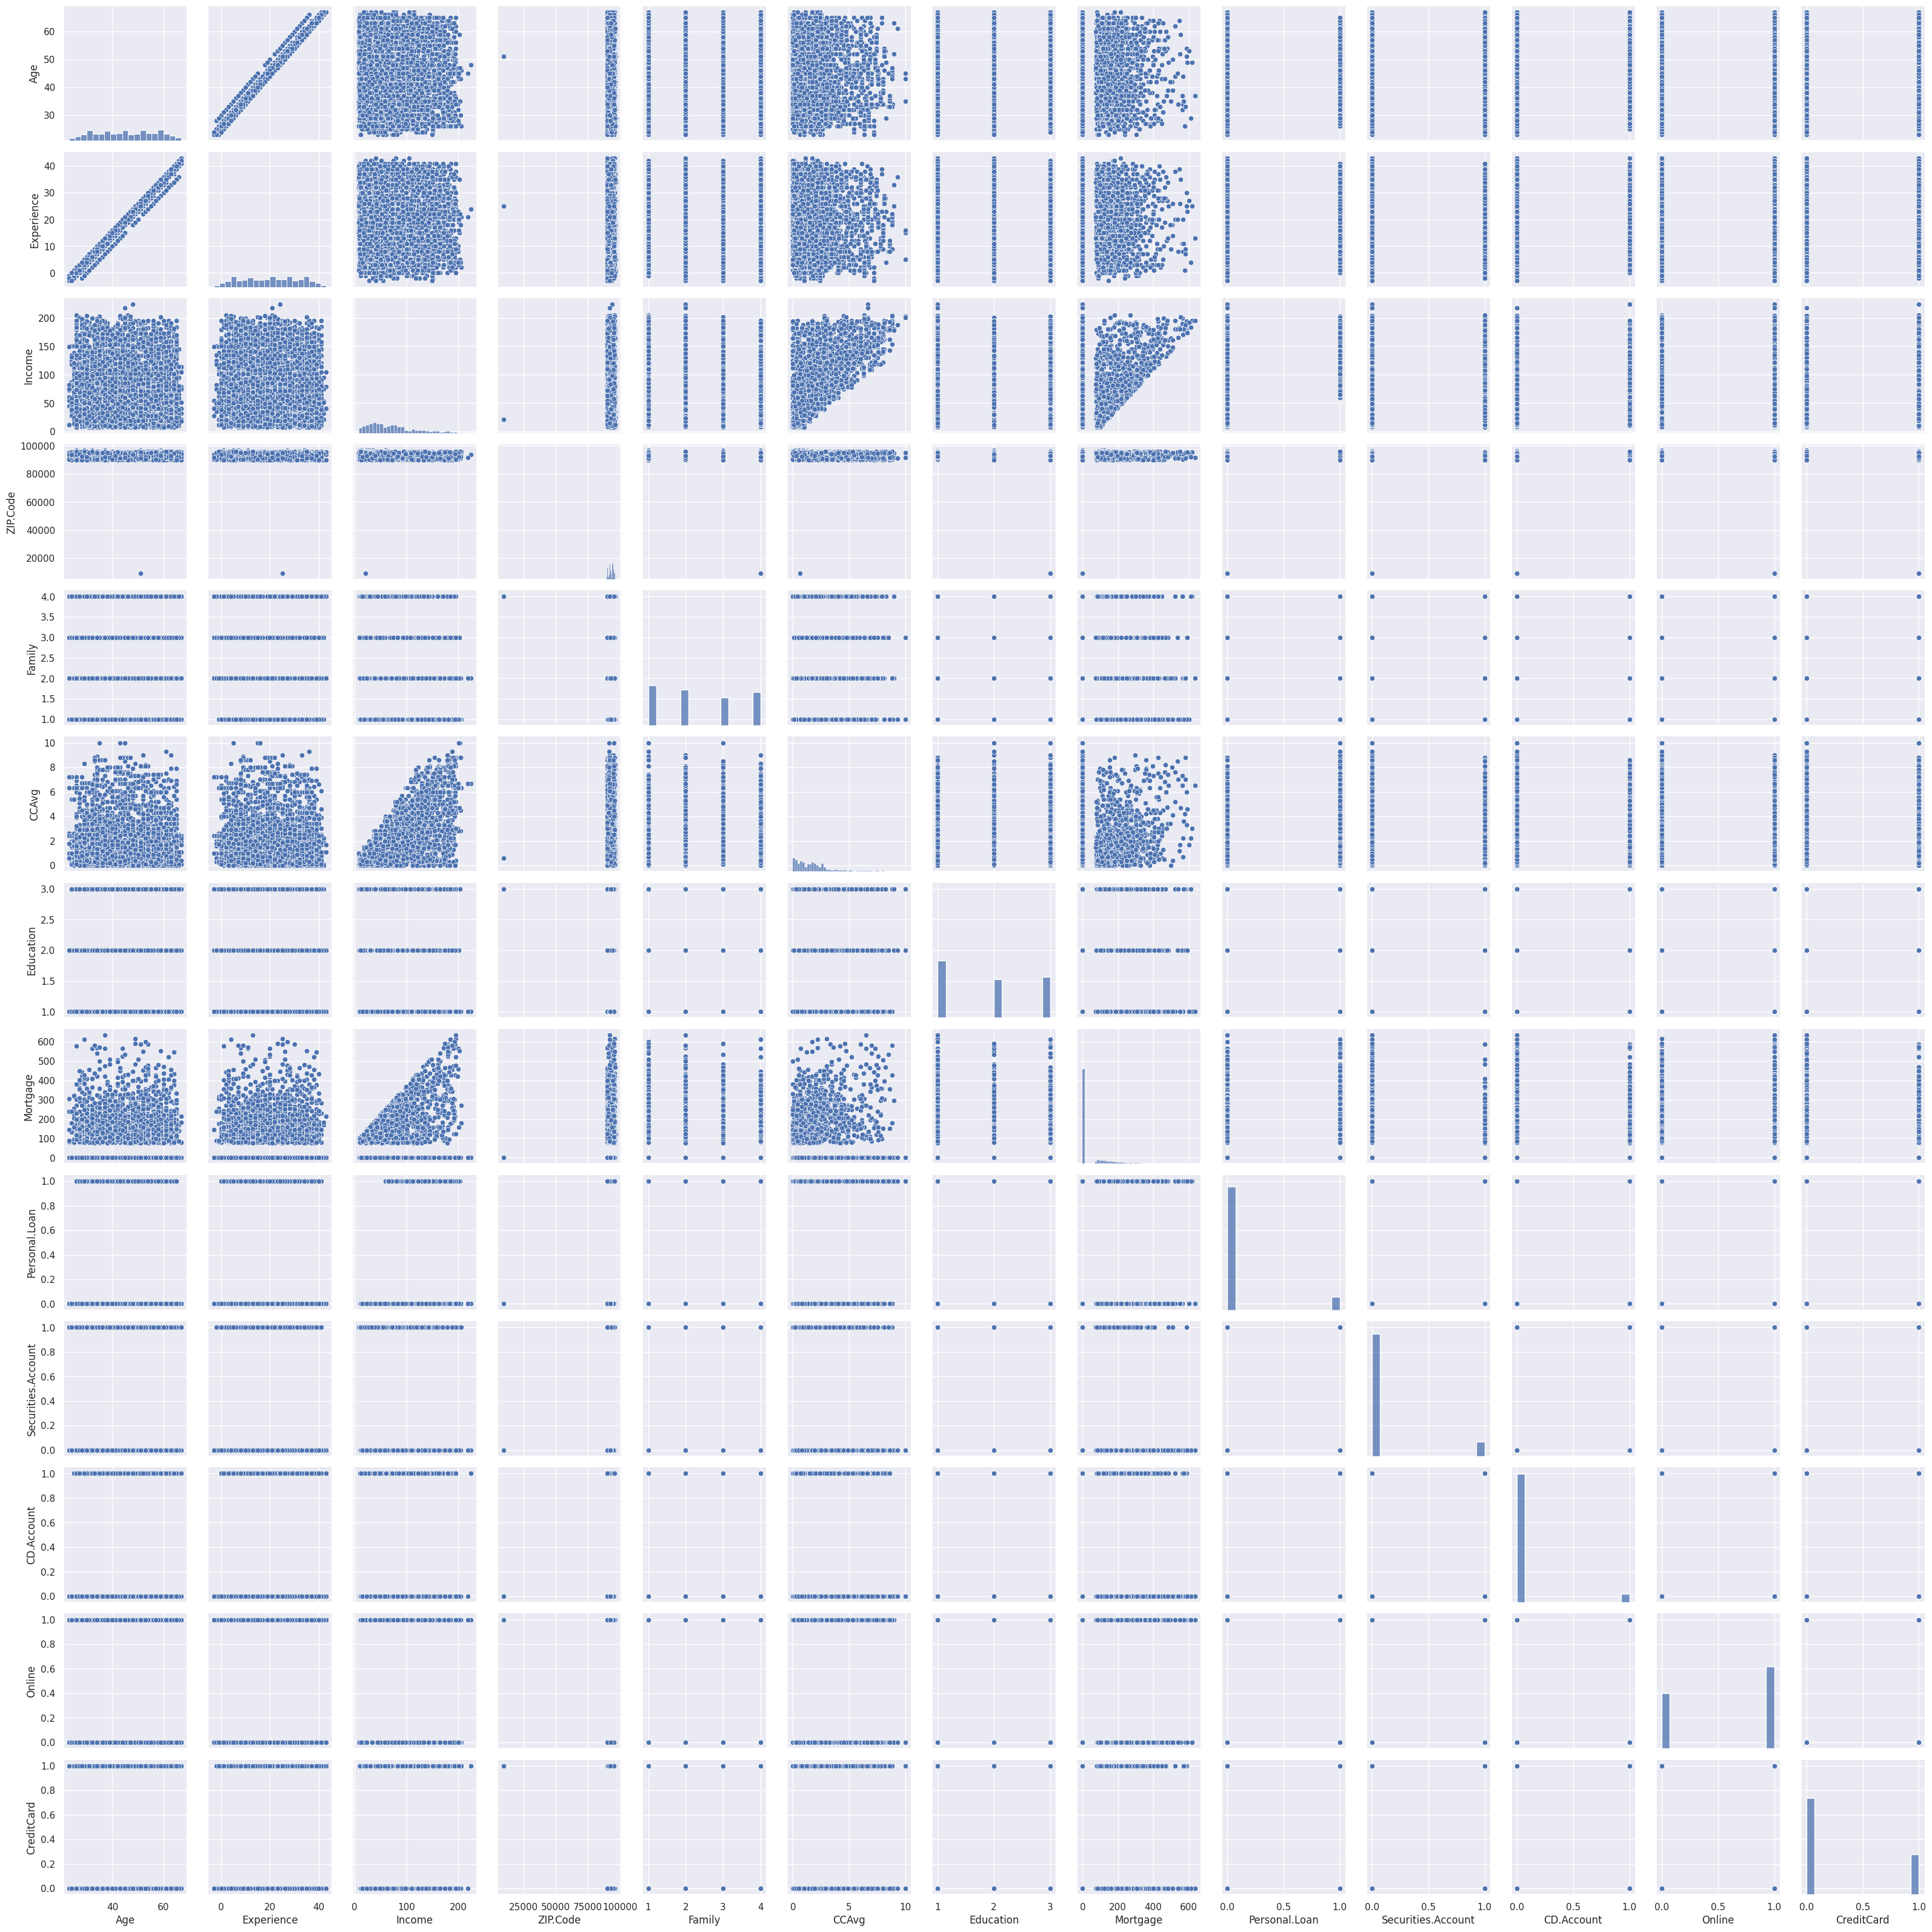

In [22]:
sns.pairplot(data.iloc[:,1:])

Lets get the categorical features. We consider the features which are having less than 25 values as categorical.

In [23]:
cat_features = [feature for feature in data.columns if data[feature].nunique()<25]
print('Categorical Features : ', cat_features)
data[cat_features].head()

Categorical Features :  ['Family', 'Education', 'Personal.Loan', 'Securities.Account', 'CD.Account', 'Online', 'CreditCard']


Family  Education  Personal.Loan  Securities.Account  CD.Account  Online  \
0       4          1              0                   1           0       0   
1       3          1              0                   1           0       0   
2       1          1              0                   0           0       0   
3       1          2              0                   0           0       0   
4       4          2              0                   0           0       0   

   CreditCard  
0           0  
1           0  
2           0  
3           0  
4           1

Continues features

In [24]:
cont_features = [feature for feature in data.columns if feature not in cat_features + ['ID']]
cont_features

['Age', 'Experience', 'Income', 'ZIP.Code', 'CCAvg', 'Mortgage']

Let us visualize the distribution of each of the categorical features

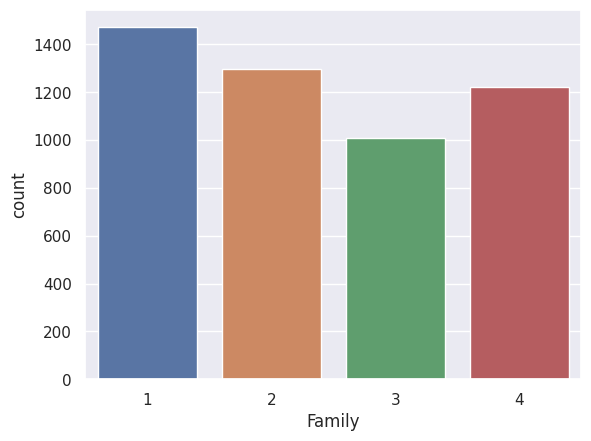

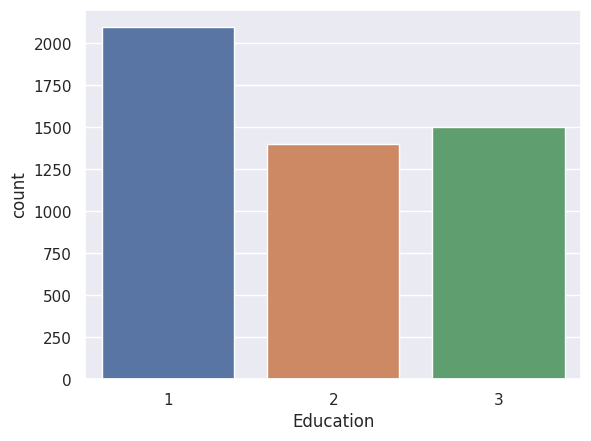

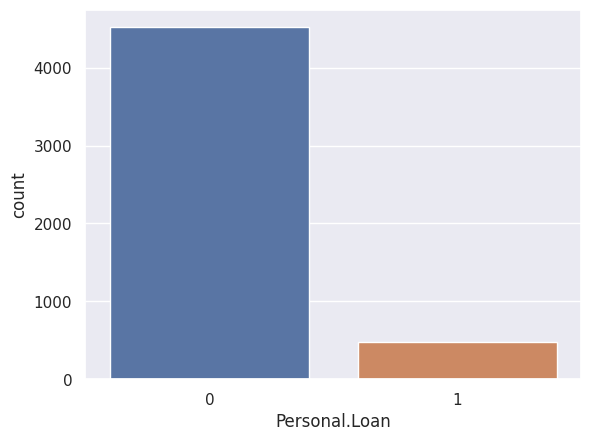

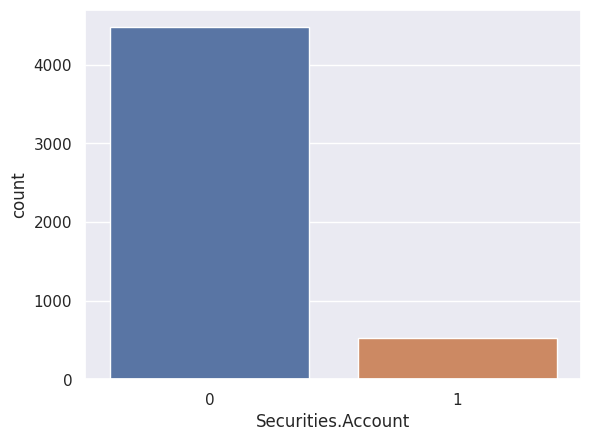

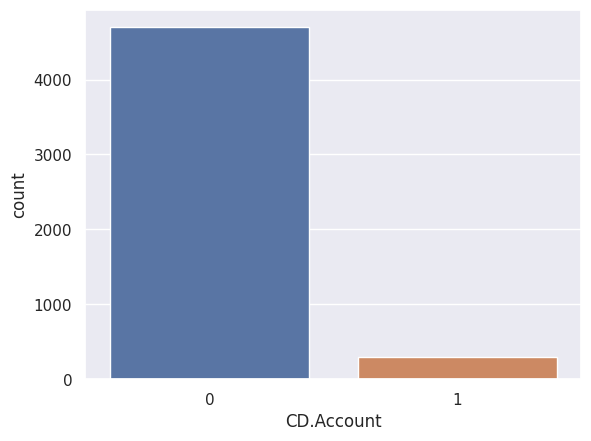

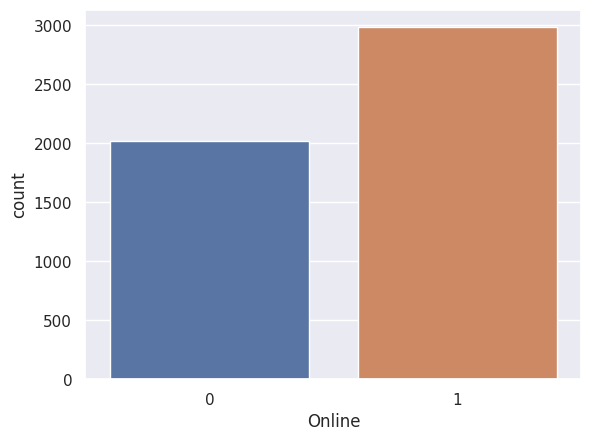

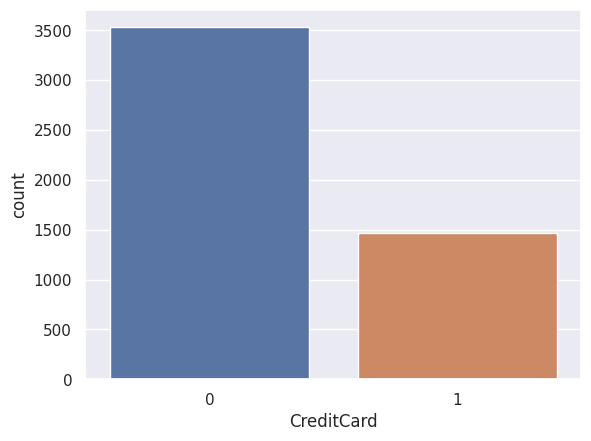

In [32]:
for feature in cat_features:
    sns.countplot(data=data, x=feature)

    plt.show()

We can see that the number of customers who took the loan last year(our target variable) were very less (<500) compared to the set of customers who haven't taken the loan(>4500). As such, the dataset is highly imbalanced. (Will this affect our algorithms? )

Very few customers have Securities account or CD account. (< 500)

Majority of the customers do not own Credit Cards as well. (>3500)

Let us check the distribution of the continuous features now.

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


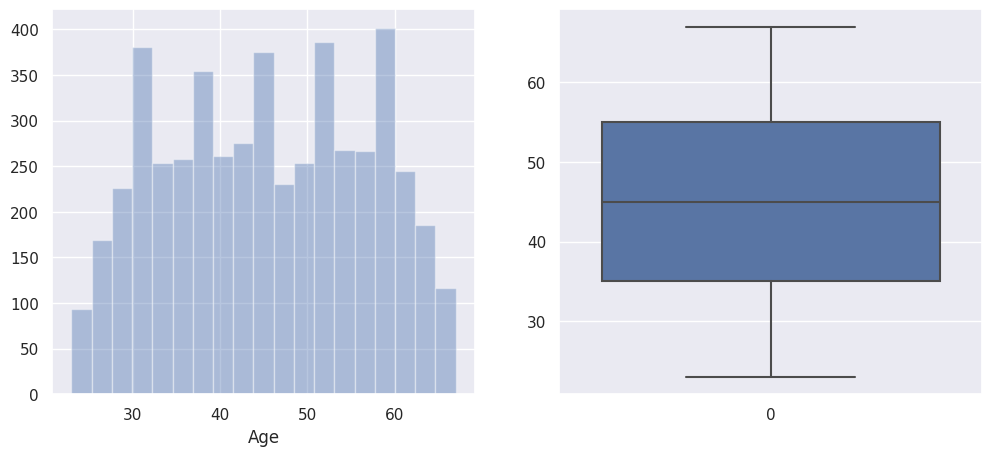

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


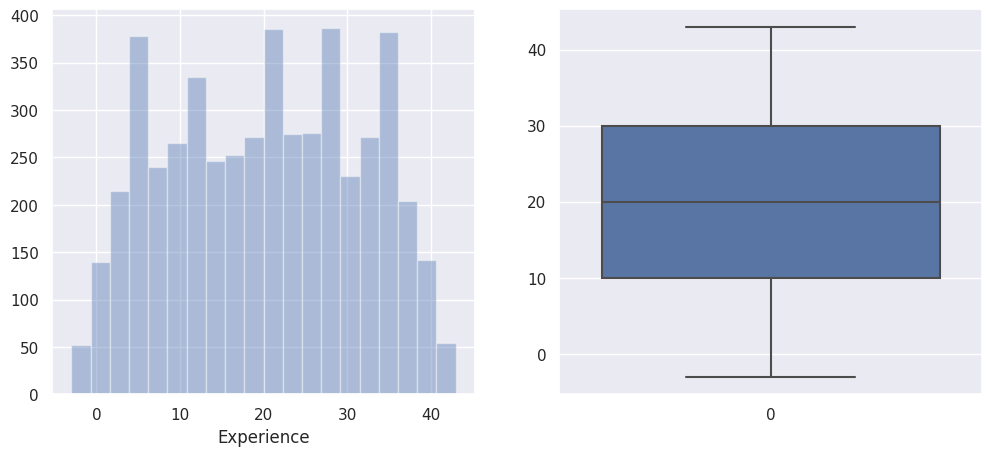

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


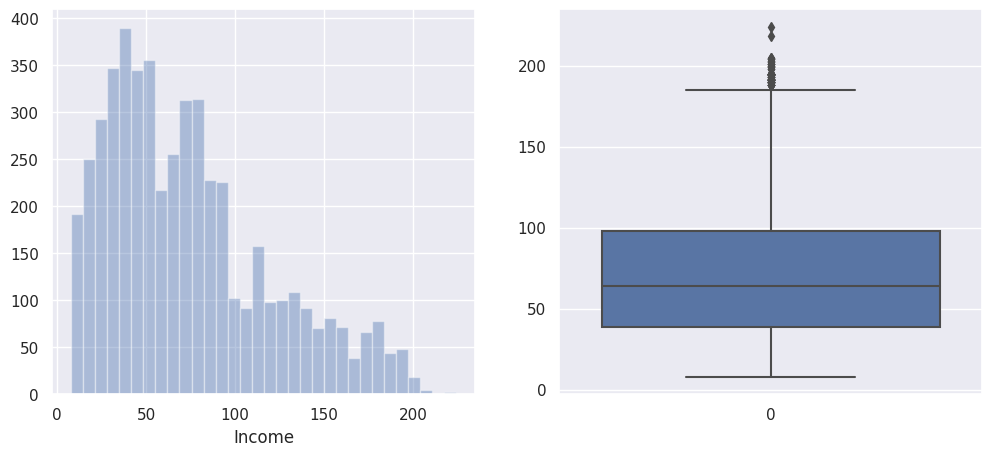

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


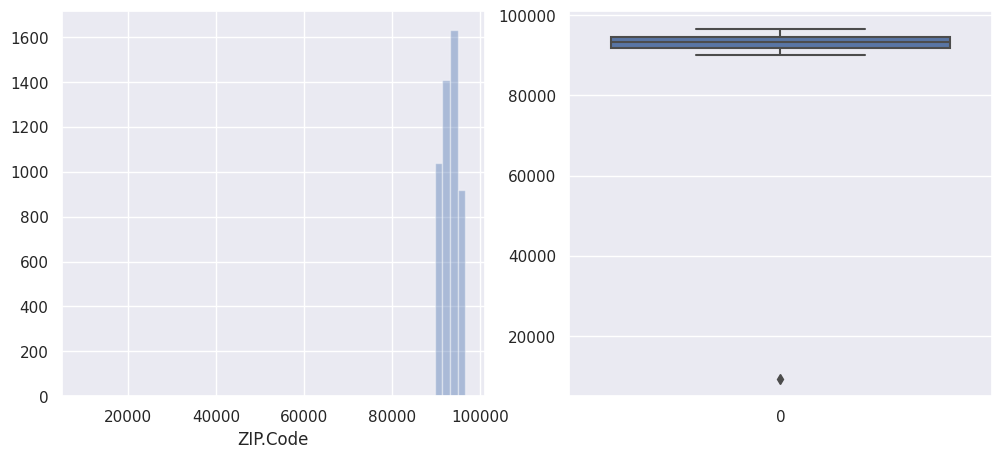

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


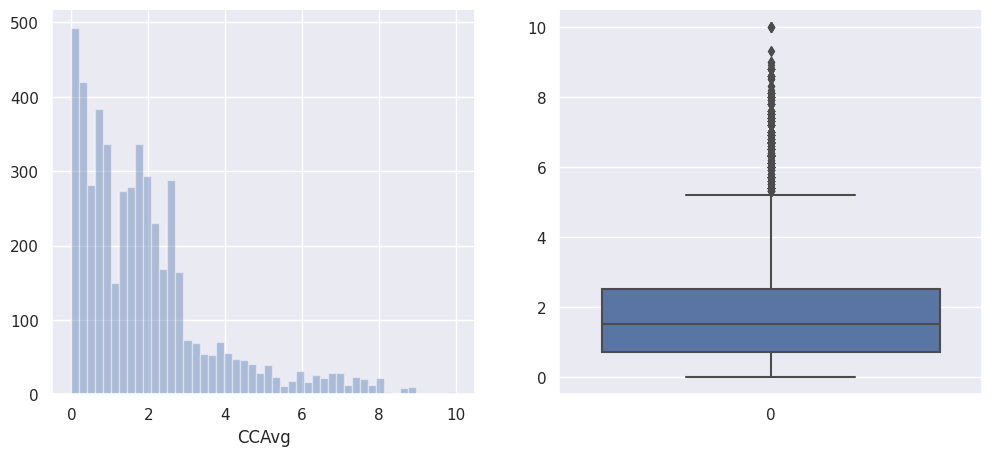

<ipython-input-33-4af404eb95bb>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[feature], kde=False, ax=ax1)


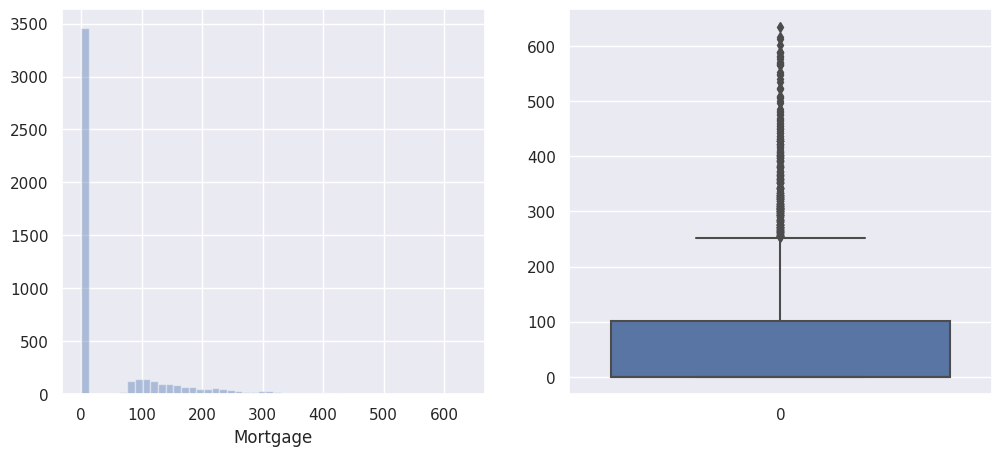

In [33]:
for feature in cont_features:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
    sns.distplot(data[feature], kde=False, ax=ax1)
    sns.boxplot(data[feature], ax=ax2)
    plt.show()


Let us check how the CCAvg varies with Income

<Axes: xlabel='Income', ylabel='CCAvg'>

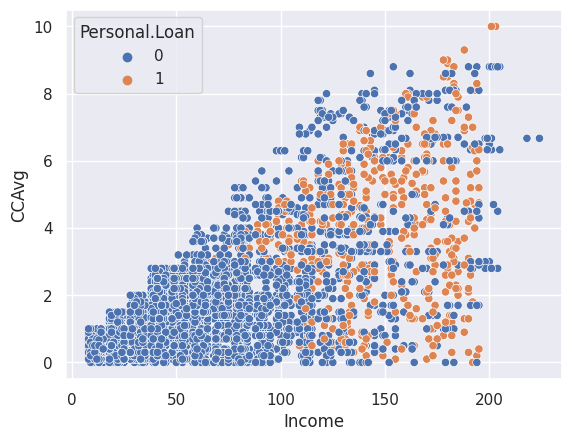

In [35]:
sns.scatterplot(x='Income',y='CCAvg',hue='Personal.Loan', data=data)

<ipython-input-36-c7bc7d9d47ed>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(x='Income',y='CCAvg', data=data, estimator=np.median, ci=None)


<Axes: xlabel='Income', ylabel='CCAvg'>

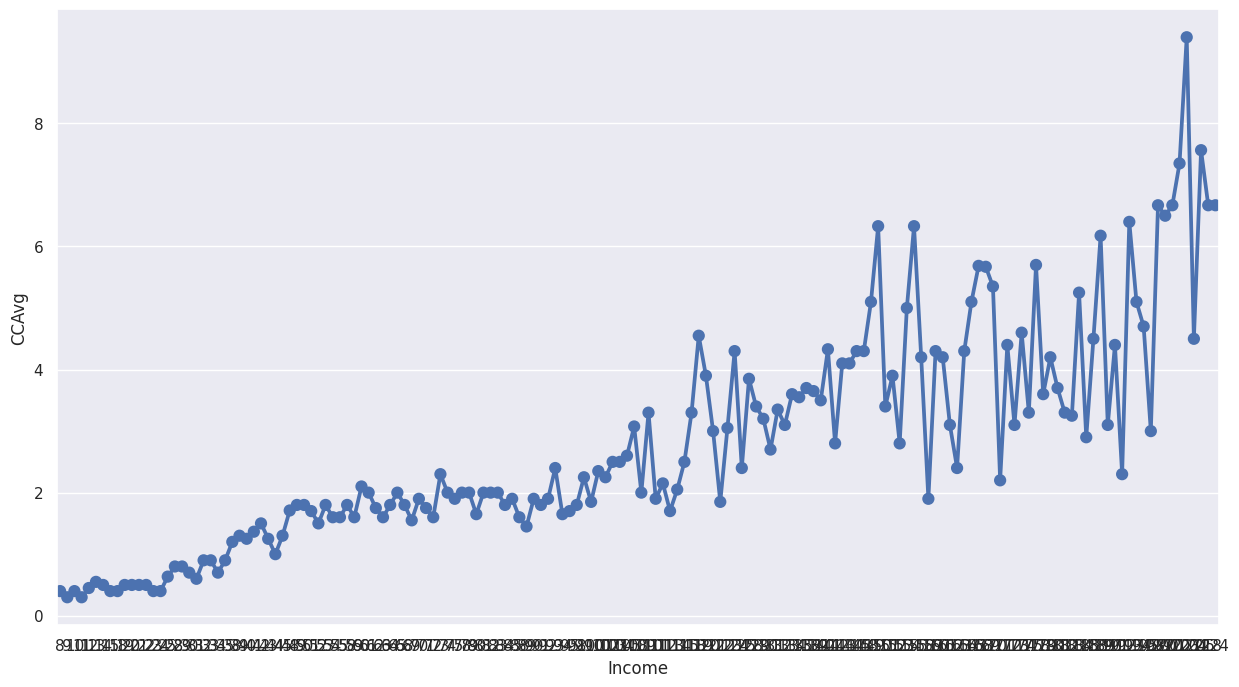

In [36]:
plt.figure(figsize=(15,8))
sns.pointplot(x='Income',y='CCAvg', data=data, estimator=np.median, ci=None)

The observations from above are:
  -> People having more income tend to spend more on their credit card.

  -> From the 1st figure it is clear that people with higher income opted for the Personal Loan.

  -> Also, people don't tend to spend more than their income on the credit card. (Scatterplot triangular)

**Let us now see how the income varies with the Education and Experience**

<Axes: xlabel='Education', ylabel='Income'>

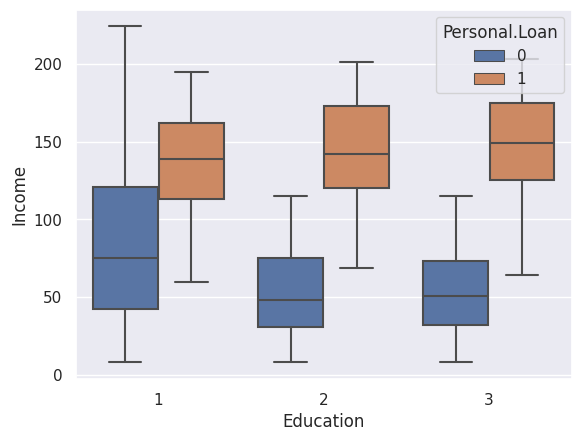

In [38]:
sns.boxplot(x='Education',y='Income',hue='Personal.Loan',data=data)

<Axes: xlabel='Experience', ylabel='Income'>

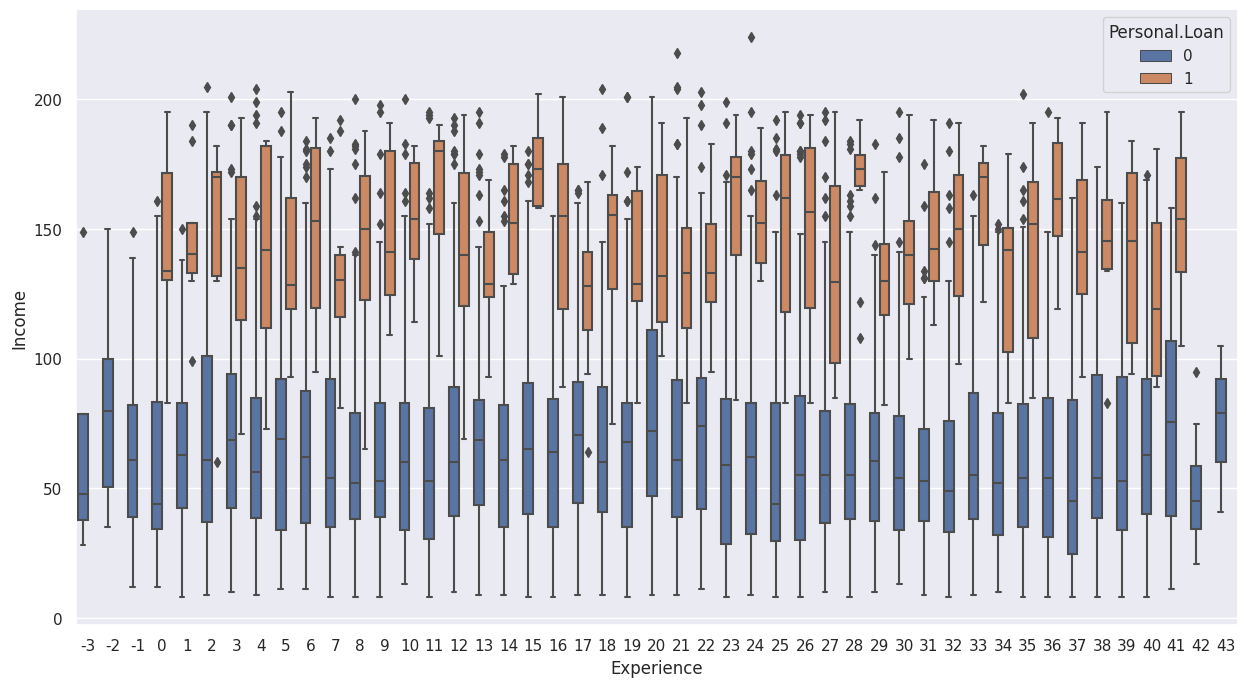

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Experience',y='Income',hue='Personal.Loan',data=data)

People with lower education are earning more income. And Income does'nt vary based on one's Experience. Also, Personal loan neither strongly depend on Education nor Experience

Personal loan is dependent on the income though. It is evident from the higher band boxplots for Personal Loan, people with higher income tend to opt for Personal Loan (supports our earlier stament)

From the ZIP Code box plot, there is an outlier. Seems like one of the customers is in Asgard. Let's try convincing Heimdall, the gatekeeper of the Bifröst bridge to bring him back to Earth

In [42]:
print(data['ZIP.Code'].min())
print(data['ZIP.Code'].max())
data['ZIP.Code'].unique()

9307
96651


array([91107, 90089, 94720, 94112, 91330, 92121, 91711, 93943, 93023,
       94710, 90277, 93106, 94920, 91741, 95054, 95010, 94305, 91604,
       94015, 90095, 91320, 95521, 95064, 90064, 94539, 94104, 94117,
       94801, 94035, 92647, 95814, 94114, 94115, 92672, 94122, 90019,
       95616, 94065, 95014, 91380, 95747, 92373, 92093, 94005, 90245,
       95819, 94022, 90404, 93407, 94523, 90024, 91360, 95670, 95123,
       90045, 91335, 93907, 92007, 94606, 94611, 94901, 92220, 93305,
       95134, 94612, 92507, 91730, 94501, 94303, 94105, 94550, 92612,
       95617, 92374, 94080, 94608, 93555, 93311, 94704, 92717, 92037,
       95136, 94542, 94143, 91775, 92703, 92354, 92024, 92831, 92833,
       94304, 90057, 92130, 91301, 92096, 92646, 92182, 92131, 93720,
       90840, 95035, 93010, 94928, 95831, 91770, 90007, 94102, 91423,
       93955, 94107, 92834, 93117, 94551, 94596, 94025, 94545, 95053,
       90036, 91125, 95120, 94706, 95827, 90503, 90250, 95817, 95503,
       93111, 94132,

1 zipcode is having only 4 digit which probably is a typo error. We will change it to 5 digits by appending a 0 to maintain the geographic area of atleast first 4 digits.

In [43]:
data['ZIP Code'] = data['ZIP.Code'].apply(lambda zip: zip*10 if zip/10000 < 1 else zip)

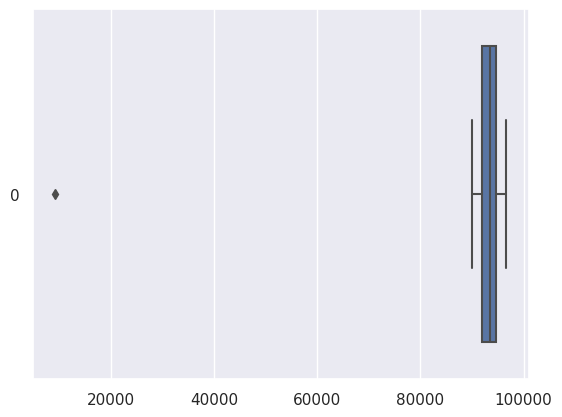

In [47]:
sns.boxplot(data=data['ZIP.Code'], orient='horizontal')

plt.show()

Let see the correlation between data features

<Axes: >

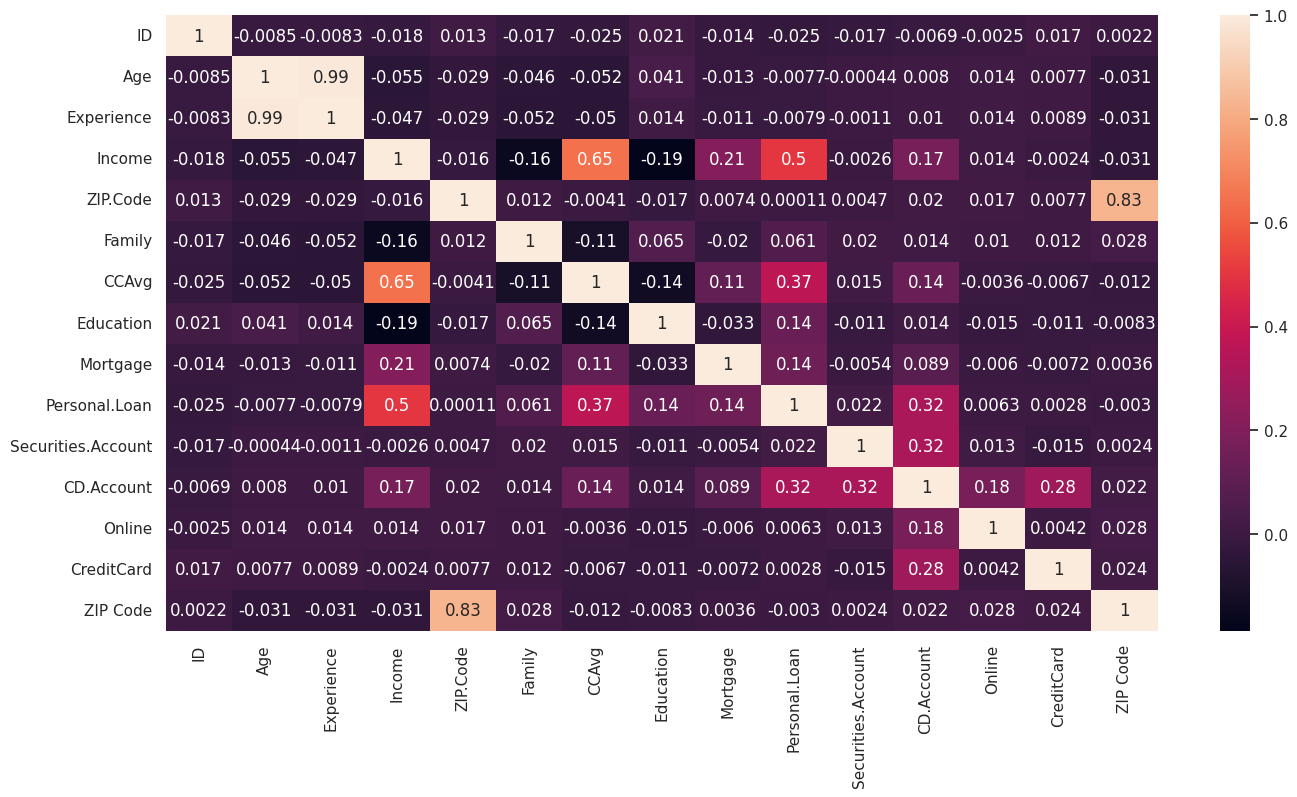

In [50]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True)

Observations from the above heatmap:

  -> Age and Experience are highly correlated(0.99)

  -> CCAVg and Income are correlated (we saw this earlier too).

  -> Personal loan is correlated to Income.

# **Preprocessing**

Let us instead replace leftover negative Experience values by 0

In [49]:
data.loc[data['Experience'] < 0, 'Experience'] = 0
data[data['Experience'] < 0]
print(data['Experience'].unique())

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22  0 34 38 40 33  4 42 43]


Lets remove the unwanted variables split the data to X and y

In [55]:
X = data.drop(['ID', 'ZIP.Code', 'Personal.Loan'], axis = 1)
y = data['Personal.Loan']
X

Age  Experience  Income  Family  CCAvg  Education  Mortgage  \
0      25           1      49       4    1.6          1         0   
1      45          19      34       3    1.5          1         0   
2      39          15      11       1    1.0          1         0   
3      35           9     100       1    2.7          2         0   
4      35           8      45       4    1.0          2         0   
...   ...         ...     ...     ...    ...        ...       ...   
4995   29           3      40       1    1.9          3         0   
4996   30           4      15       4    0.4          1        85   
4997   63          39      24       2    0.3          3         0   
4998   65          40      49       3    0.5          2         0   
4999   28           4      83       3    0.8          1         0   

      Securities.Account  CD.Account  Online  CreditCard  ZIP Code  
0                      1           0       0           0     91107  
1                      1           0       0           0     90089  
2                      0           0       0           0     94720  
3                      0           0       0           0     94112  
4                      0           0       0           1     91330  
...                  ...         ...     ...         ...       ...  
4995                   0           0       1           0     92697  
4996                   0           0       1           0     92037  
4997                   0           0       0           0     93023  
4998                   0           0       1           0     90034  
4999                   0           0       1           1     92612  

[5000 rows x 12 columns]

Check Null values

In [56]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP.Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal.Loan         0
Securities.Account    0
CD.Account            0
Online                0
CreditCard            0
ZIP Code              0
dtype: int64


check if there is duplicated rows

In [57]:
data.duplicated().sum()

0

Check how many unique value in each column

In [58]:
data.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP.Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal.Loan            2
Securities.Account       2
CD.Account               2
Online                   2
CreditCard               2
ZIP Code               467
dtype: int64

drop id column

In [59]:
data=data.iloc[:,1:]

In [60]:
data.nunique()

Age                    45
Experience             44
Income                162
ZIP.Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal.Loan           2
Securities.Account      2
CD.Account              2
Online                  2
CreditCard              2
ZIP Code              467
dtype: int64

# **Splitting Data**

In [64]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.4)

In [67]:
print(len(X_train))
print(len(y_train))

3000
3000


In [68]:
print(len(X_test))
print(len(y_test))

2000
2000


In [70]:
trn=y_train.value_counts()
trn

0    2725
1     275
Name: Personal.Loan, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

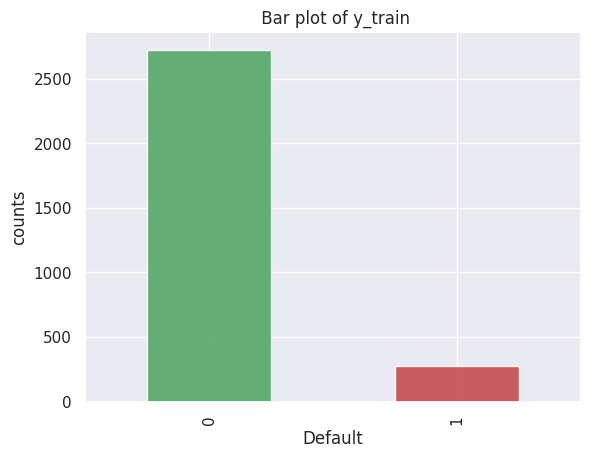

In [71]:
trn.plot.bar(color=('g',"r"),alpha=0.9)
plt.title(" Bar plot of y_train")
plt.xlabel("Default")
plt.ylabel("counts")
plt.show

In [73]:
tst=y_test.value_counts()
tst

0    1795
1     205
Name: Personal.Loan, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

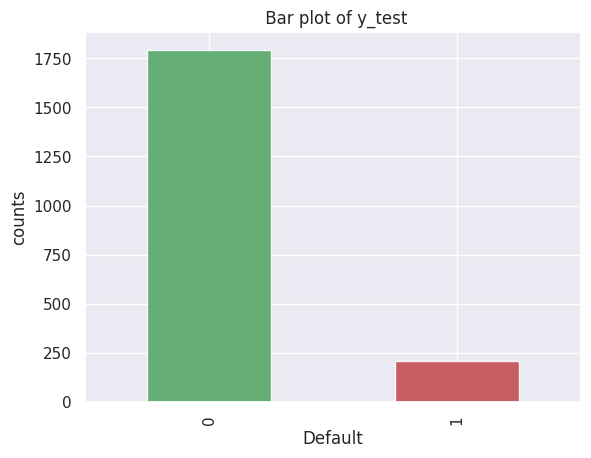

In [74]:
tst.plot.bar(color=('g',"r"),alpha=0.9)
plt.title(" Bar plot of y_test")
plt.xlabel("Default")
plt.ylabel("counts")
plt.show

# **Build Model**

# Applying Decision Tree Model


In [75]:
clf=tree.DecisionTreeClassifier()

Fit the model (on training data)

In [77]:
clfFit=clf.fit(X_train,y_train)
clfFit

DecisionTreeClassifier()

**double click on decision tree to see the tree or change from 50 to higher.**

[Text(0.6266622340425532, 0.9615384615384616, 'x[2] <= 113.5\ngini = 0.167\nsamples = 3000\nvalue = [2725, 275]'),
 Text(0.3384308510638298, 0.8846153846153846, 'x[4] <= 2.95\ngini = 0.042\nsamples = 2448\nvalue = [2396, 52]'),
 Text(0.0425531914893617, 0.8076923076923077, 'x[2] <= 106.5\ngini = 0.006\nsamples = 2249\nvalue = [2242, 7]'),
 Text(0.02127659574468085, 0.7307692307692307, 'gini = 0.0\nsamples = 2190\nvalue = [2190, 0]'),
 Text(0.06382978723404255, 0.7307692307692307, 'x[1] <= 8.0\ngini = 0.209\nsamples = 59\nvalue = [52, 7]'),
 Text(0.0425531914893617, 0.6538461538461539, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.0851063829787234, 0.6538461538461539, 'x[1] <= 13.0\ngini = 0.295\nsamples = 39\nvalue = [32, 7]'),
 Text(0.06382978723404255, 0.5769230769230769, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.10638297872340426, 0.5769230769230769, 'x[3] <= 3.5\ngini = 0.234\nsamples = 37\nvalue = [32, 5]'),
 Text(0.06382978723404255, 0.5, 'x[5] <= 1.5\ngini = 0.

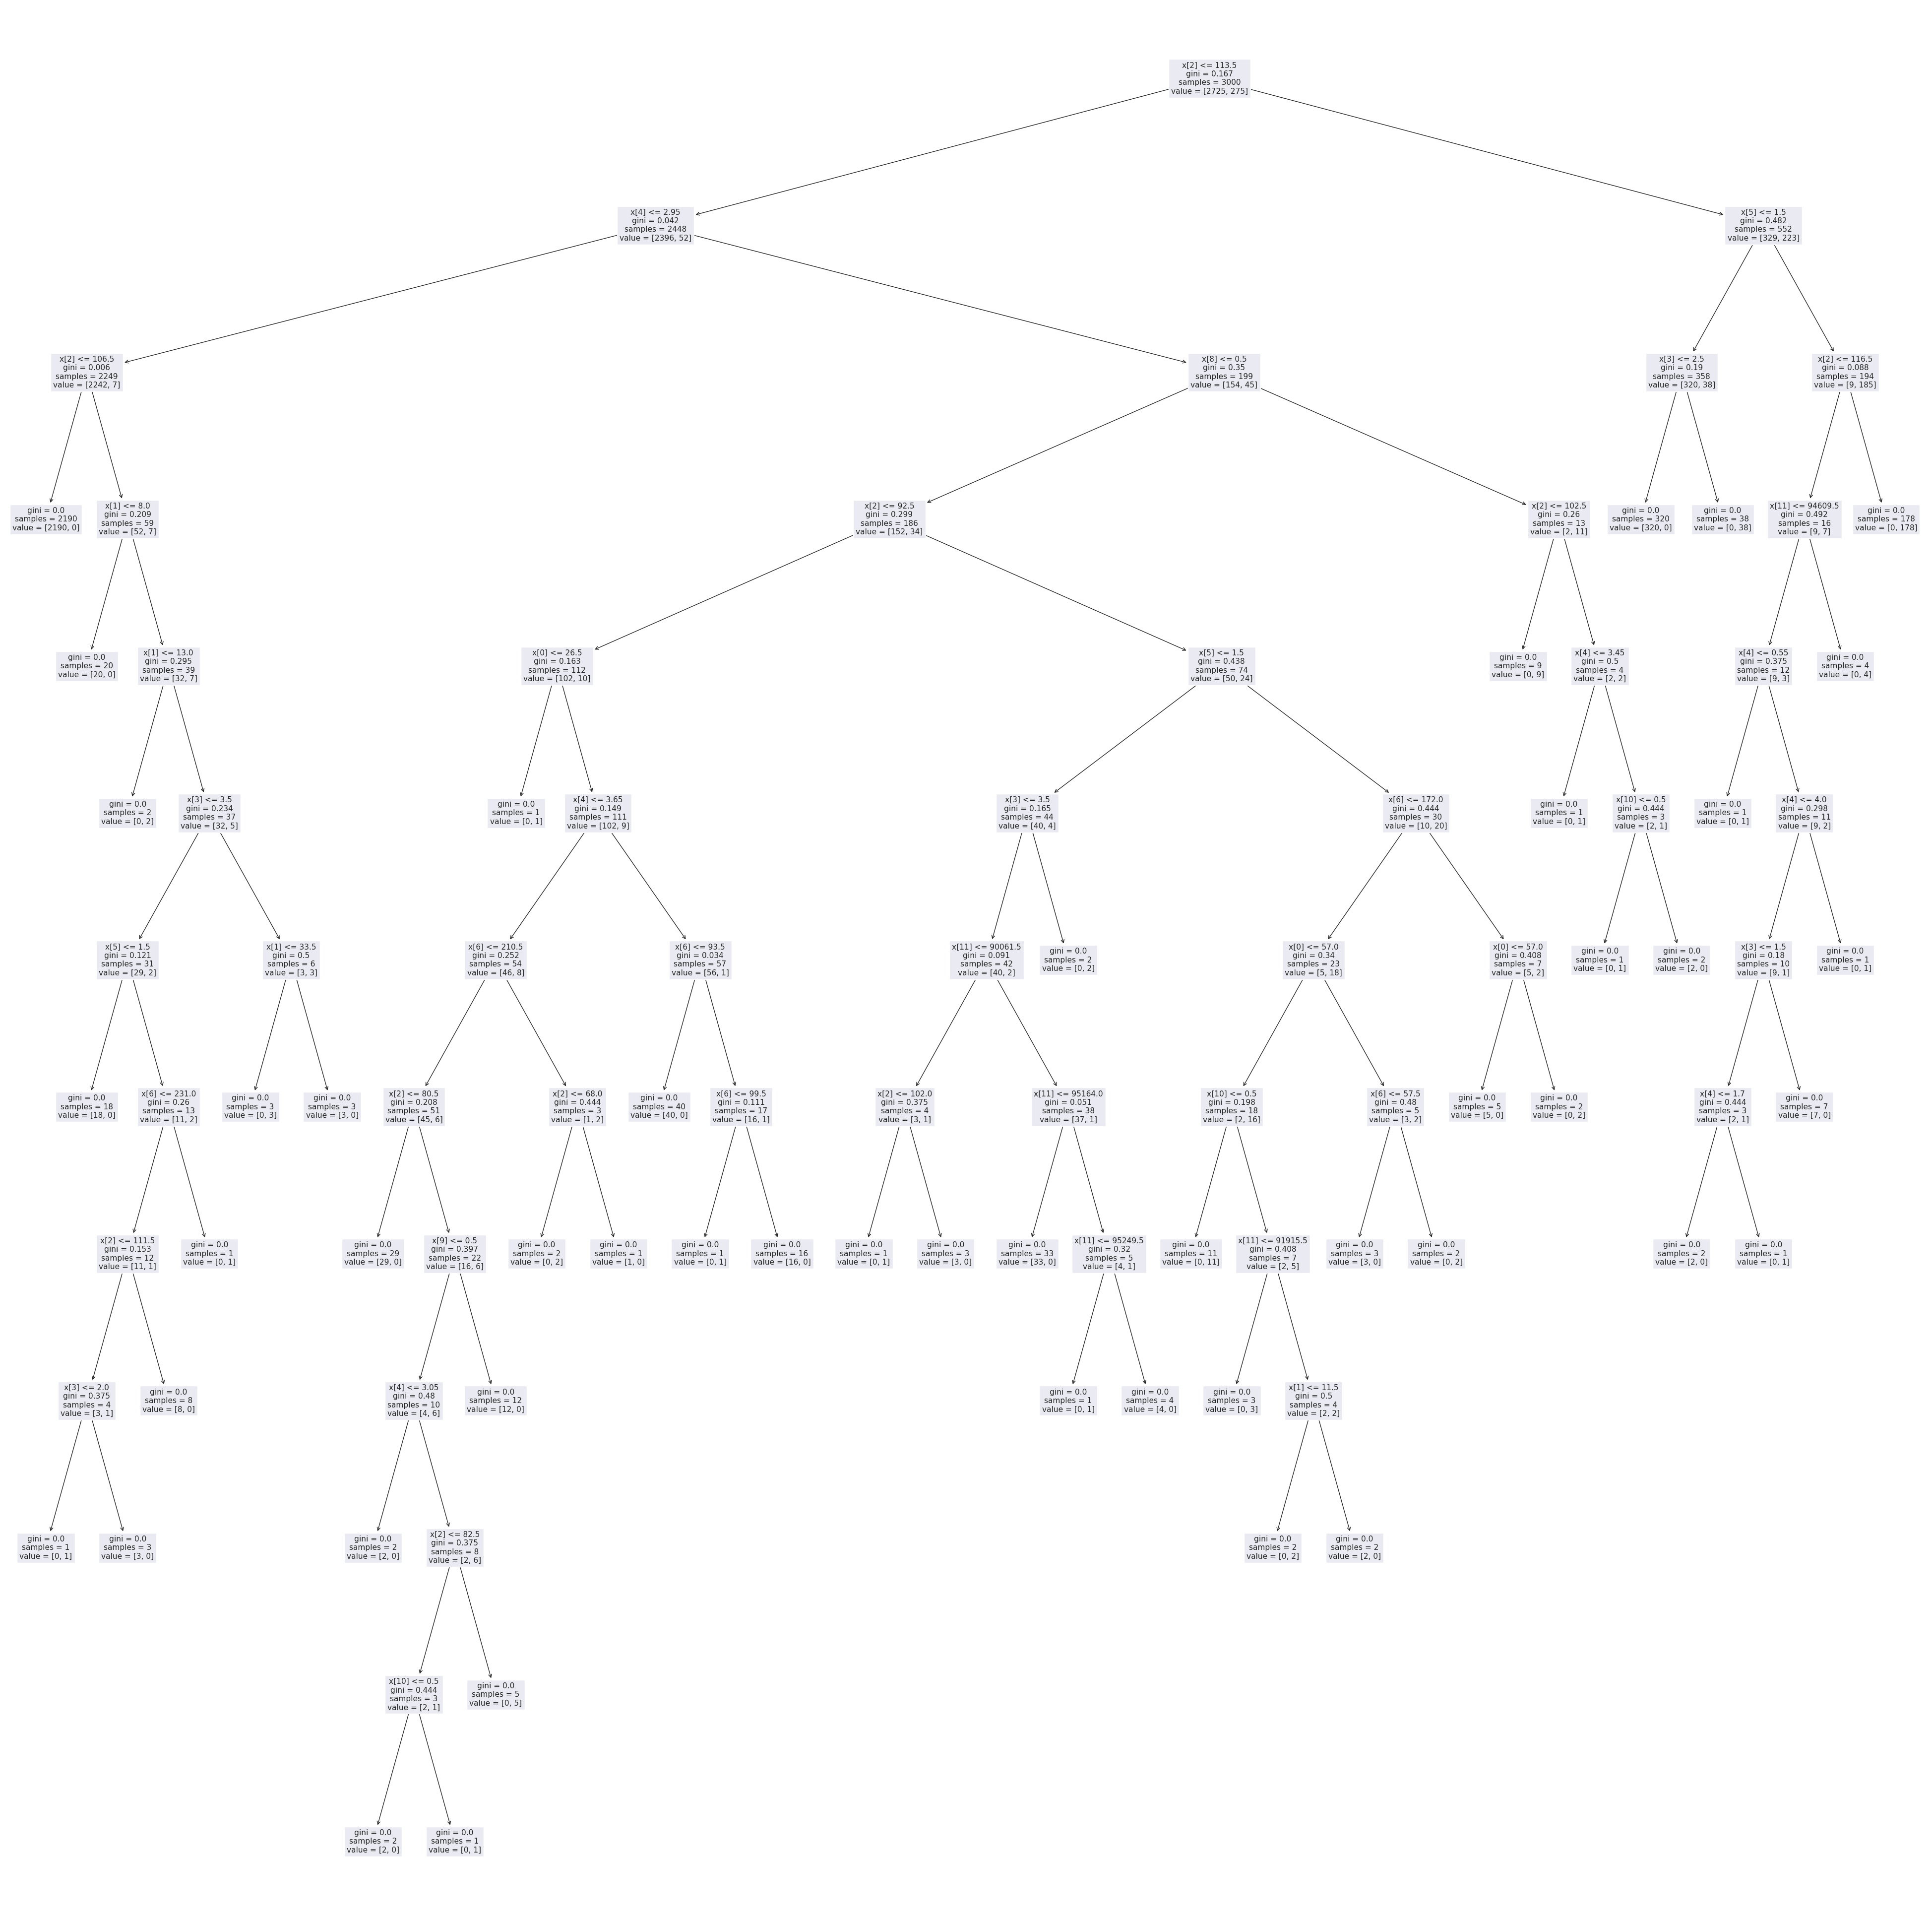

In [94]:
plt.figure(figsize=(50,50))
tree.plot_tree(clfFit)

**Prediction**

Fitting the model on testing data

In [86]:
y_pre = clfFit.predict(X_test)
y_pre

array([1, 0, 0, ..., 0, 1, 1])

**Result**

Check the confusion matrix

In [81]:
confusion_matrix(y_test,y_pre)

array([[1782,   13],
       [  17,  188]])

That is mean :

-> Predicted Positive and it is actual positive are: 188

-> Predicted Negative and it is actual Negative are: 1782

-> Predicted Negative and it is actual positive are: 17

-> Predicted Negative and it is actual positive are: 13

In [82]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1795
           1       0.94      0.92      0.93       205

    accuracy                           0.98      2000
   macro avg       0.96      0.95      0.96      2000
weighted avg       0.98      0.98      0.98      2000



Check the model accuracy

In [83]:
accuracy_score(y_test,y_pre)

0.985

**Roc curve**

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a classification model. It illustrates the trade-off between the model's true positive rate (sensitivity) and false positive rate (1-specificity) for different classification thresholds.

The ROC curve is created by plotting the true positive rate (TPR) on the y-axis and the false positive rate (FPR) on the x-axis.

used in machine learning to compare and select the best model, find the optimal classification threshold, and evaluate the model's discrimination power.

 predicts the probability of the positive class (class 1) for each sample in the test set X_test using a classifier clfFit.

In [85]:
y_prob = clfFit.predict_proba(X_test)[:,1]
y_prob

array([1., 0., 0., ..., 0., 1., 1.])

In [95]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)

In [88]:
false_positive_rate

array([0.        , 0.00724234, 1.        ])

In [89]:
true_positive_rate

array([0.        , 0.91707317, 1.        ])

In [90]:
thresholds

array([2., 1., 0.])

 calculates the area under the ROC curve (AUC-ROC) using the false positive rates and true positive rates. The AUC-ROC represents the overall performance of the classifier and is stored in the variable roc_auc

In [92]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9549154154494192

Plotting Roc Curve

Text(0.5, 0, 'False Positive Rate')

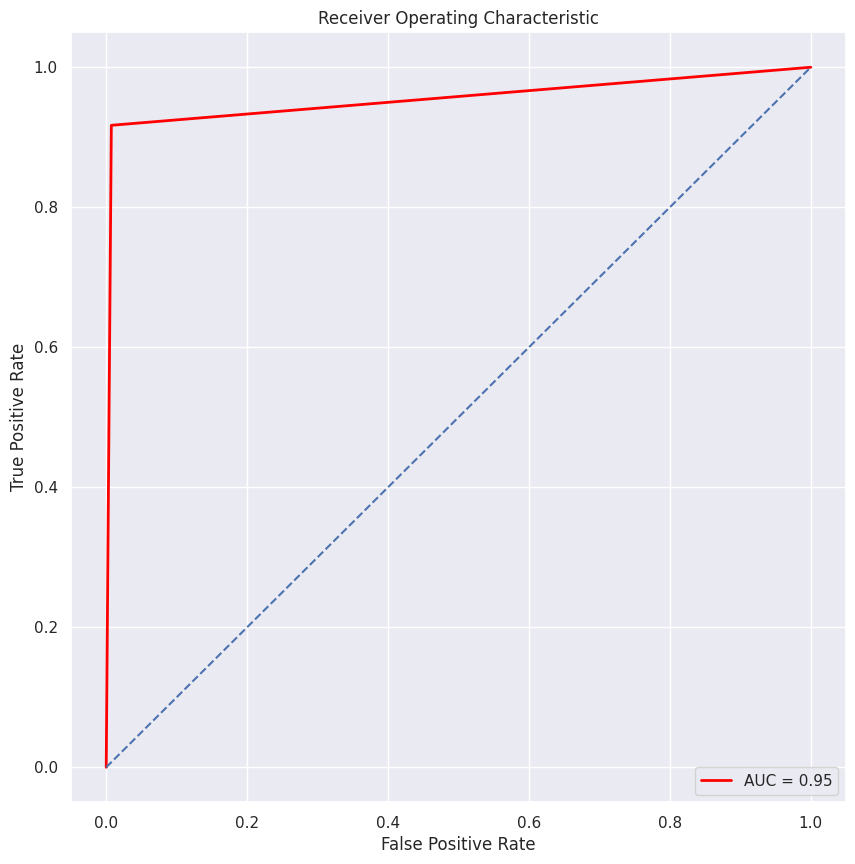

In [93]:
plt.figure(figsize=(10,10))
lw=2
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',lw=lw,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The ROC curve provides a visual way to assess the model's performance across different classification thresholds. A diagonal line from the bottom left to the top right represents a random classifier, while a curve that is closer to the top left corner indicates a better classification performance.

The area under the ROC curve, known as AUC-ROC, is often used as a metric to quantify the overall performance of a classification model. A higher AUC-ROC value (ranging from 0 to 1) indicates a better model performance in terms of distinguishing between the positive and negative classes.

# **Trying another models**

**Function to print the different metrics such as confusion matrix, roc, accuracy, precision, recall etc**


In [97]:
def printModelMetrics(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print('Train set accuracy = ', metrics.accuracy_score(y_train, y_train_pred))
    print('Test set accuracy = ', metrics.accuracy_score(y_test, y_test_pred))
    print(metrics.classification_report(y_test, y_test_pred))

    cm = metrics.confusion_matrix(y_test, y_test_pred)
    cm = pd.DataFrame(cm, columns=['Predicted No Loan', 'Predicted Loan'], index=['Truth No Loan', 'Truth Loan'])
    sns.heatmap(cm, annot=True, fmt='g', cbar=False)
    plt.show()

    y_test_proba = model.predict_proba(X_test)
    y_test_proba = y_test_proba[:,1]
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(y_test))]
    # calculate scores
    ns_auc = metrics.roc_auc_score(y_test, ns_probs)
    lr_auc = metrics.roc_auc_score(y_test, y_test_proba)
    # summarize scores
    print('ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = metrics.roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, y_test_proba)
    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='Model Skill')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()

**Logistic Regression**

Train set accuracy =  0.9106666666666666
Test set accuracy =  0.907
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1795
           1       0.58      0.32      0.42       205

    accuracy                           0.91      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.89      0.91      0.89      2000



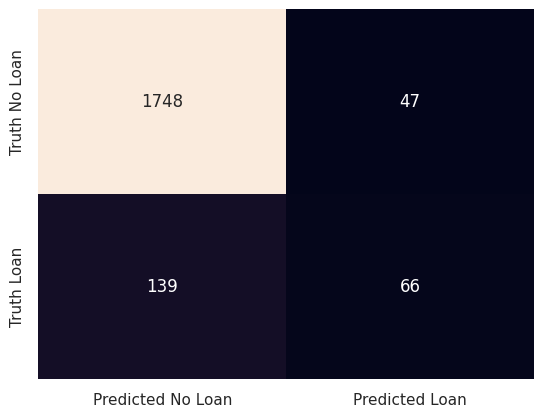

ROC AUC=0.923


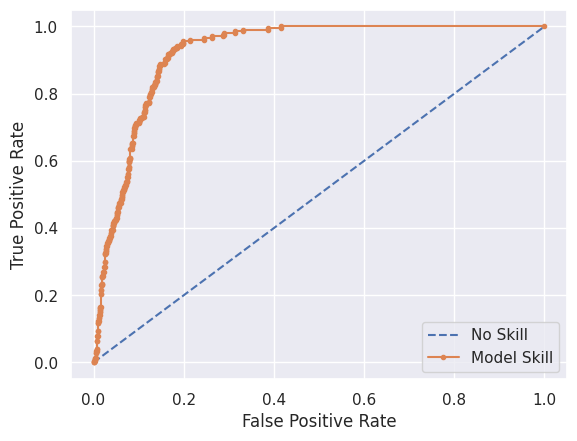

In [99]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
printModelMetrics(lr_model, X_train, X_test, y_train, y_test)

**Naive Bayse**

Train set accuracy =  0.9106666666666666
Test set accuracy =  0.907
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1795
           1       0.58      0.32      0.42       205

    accuracy                           0.91      2000
   macro avg       0.76      0.65      0.68      2000
weighted avg       0.89      0.91      0.89      2000



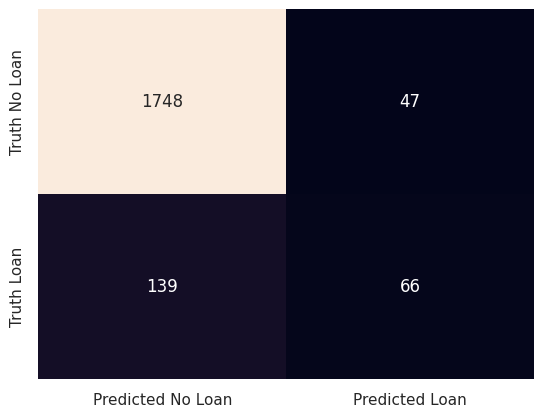

ROC AUC=0.923


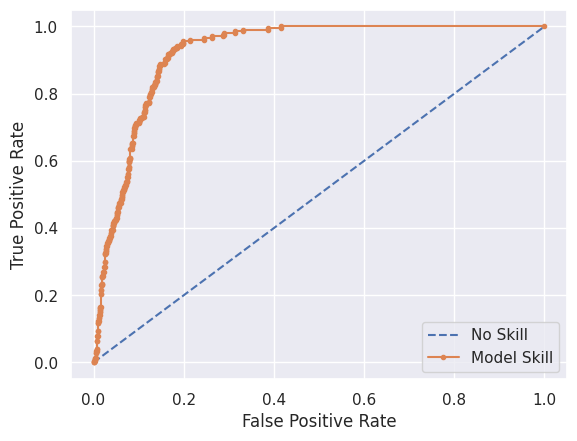

In [100]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
printModelMetrics(lr_model, X_train, X_test, y_train, y_test)


**K Nearest Neighbours**

Train set accuracy =  1.0
Test set accuracy =  0.935
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1795
           1       0.89      0.41      0.57       205

    accuracy                           0.94      2000
   macro avg       0.92      0.70      0.77      2000
weighted avg       0.93      0.94      0.92      2000



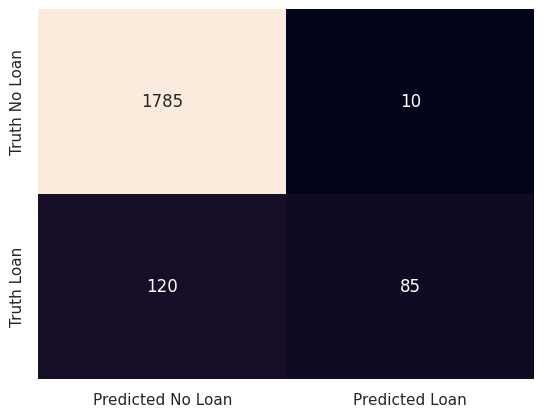

ROC AUC=0.945


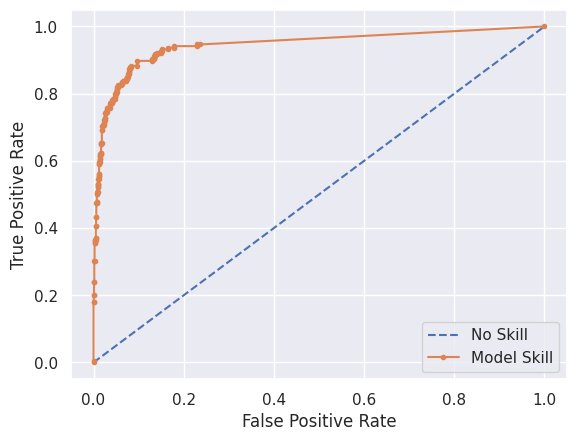

In [101]:
X_trainScaled = X_train.apply(zscore)
X_testScaled = X_test.apply(zscore)

model = KNeighborsClassifier(n_neighbors=20, weights='distance')
model.fit(X_trainScaled, y_train)
printModelMetrics(model, X_trainScaled, X_testScaled, y_train, y_test)

**SVM**

Train set accuracy =  1.0
Test set accuracy =  0.8975
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1795
           1       0.00      0.00      0.00       205

    accuracy                           0.90      2000
   macro avg       0.45      0.50      0.47      2000
weighted avg       0.81      0.90      0.85      2000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


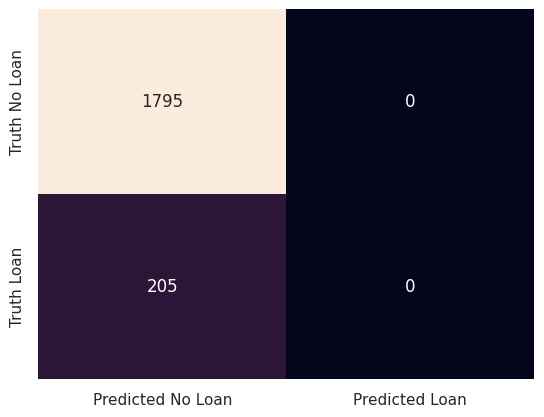

ROC AUC=0.673


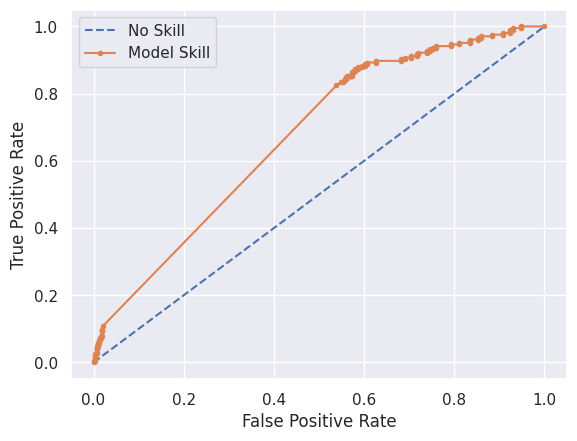

In [103]:
model = svm.SVC(gamma = 0.2, C=5, probability=True)
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

**What if we use random oversampling technique, increasing in the number of minority class samples. The purpose is to balance the class distribution and prevent the model from being biased towards the majority class.**

In [106]:
# Separate majority and minority classes
df_majority = data[data['Personal.Loan']==0]
df_minority = data[data['Personal.Loan']==1]

# Upsample minority class
df_minority_upsampled = resample(df_minority,replace=True,n_samples=df_majority.shape[0],random_state=123)

#Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['Personal.Loan'].value_counts()

X = df_upsampled.drop([ 'ZIP.Code', 'Personal.Loan', 'Experience'], axis = 1)
y = df_upsampled['Personal.Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

print('Number of 0s in Train dataset : ', y_train.value_counts()[0])
print('Number of 1s in Train dataset : ', y_train.value_counts()[1])
print('----------------')
print('Number of 0s in Test dataset : ', y_test.value_counts()[0])
print('Number of 1s in Test dataset : ', y_test.value_counts()[1])

Number of 0s in Train dataset :  3158
Number of 1s in Train dataset :  3170
----------------
Number of 0s in Test dataset :  1362
Number of 1s in Test dataset :  1350


**Trying all models again after oversampling**

Decision Tree

Train set accuracy =  1.0
Test set accuracy =  0.9952064896755162
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1362
           1       0.99      1.00      1.00      1350

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



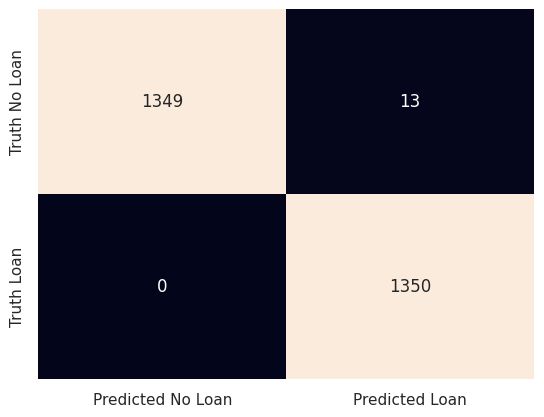

ROC AUC=0.995


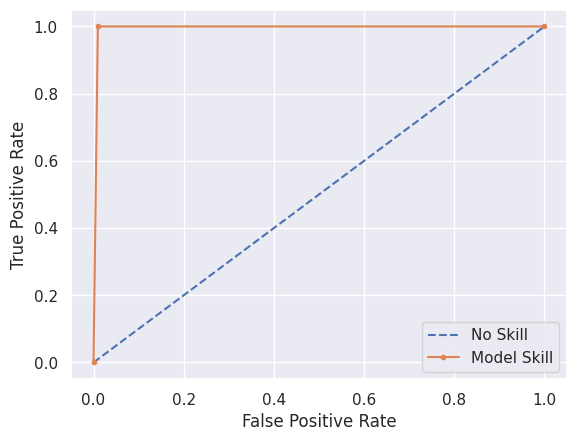

In [107]:
#clf=tree.DecisionTreeClassifier()
clfFit=clf.fit(X_train,y_train)
printModelMetrics(clf, X_train, X_test, y_train, y_test)

Logistic Regression

Train set accuracy =  0.8983881163084703
Test set accuracy =  0.9011799410029498
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1362
           1       0.90      0.91      0.90      1350

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



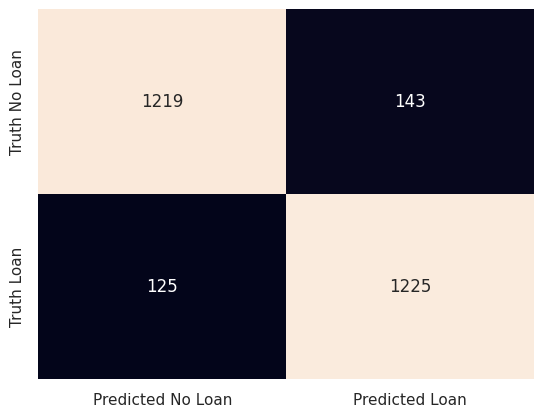

ROC AUC=0.964


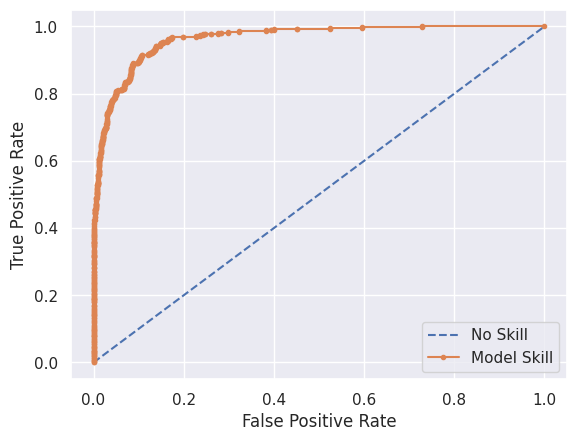

In [108]:
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
printModelMetrics(lr_model, X_train, X_test, y_train, y_test)

Naive Bayes

Train set accuracy =  0.8983881163084703
Test set accuracy =  0.9011799410029498
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1362
           1       0.90      0.91      0.90      1350

    accuracy                           0.90      2712
   macro avg       0.90      0.90      0.90      2712
weighted avg       0.90      0.90      0.90      2712



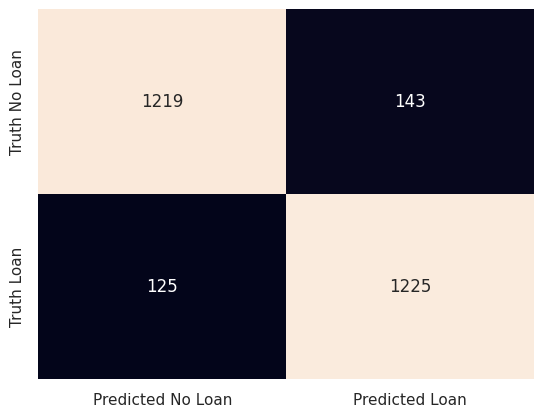

ROC AUC=0.964


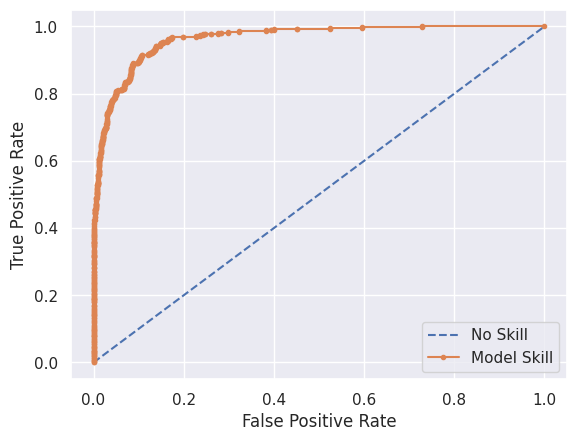

In [109]:
nb_model = BernoulliNB()
nb_model.fit(X_train, y_train)
printModelMetrics(lr_model, X_train, X_test, y_train, y_test)

K Nearest Neighbours

Train set accuracy =  1.0
Test set accuracy =  0.9679203539823009
              precision    recall  f1-score   support

           0       1.00      0.94      0.97      1362
           1       0.94      1.00      0.97      1350

    accuracy                           0.97      2712
   macro avg       0.97      0.97      0.97      2712
weighted avg       0.97      0.97      0.97      2712



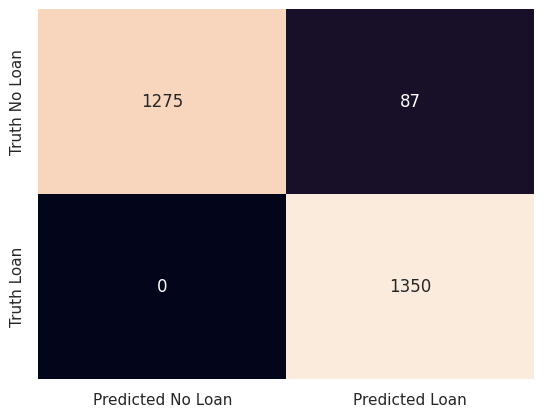

ROC AUC=0.999


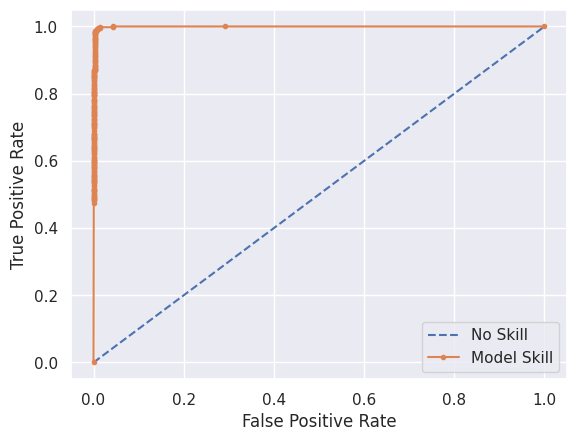

In [110]:
X_trainScaled = X_train.apply(zscore)
X_testScaled = X_test.apply(zscore)
model = KNeighborsClassifier(n_neighbors=20, weights='distance')
model.fit(X_trainScaled, y_train)
printModelMetrics(model, X_trainScaled, X_testScaled, y_train, y_test)

SVM

Train set accuracy =  1.0
Test set accuracy =  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1362
           1       1.00      1.00      1.00      1350

    accuracy                           1.00      2712
   macro avg       1.00      1.00      1.00      2712
weighted avg       1.00      1.00      1.00      2712



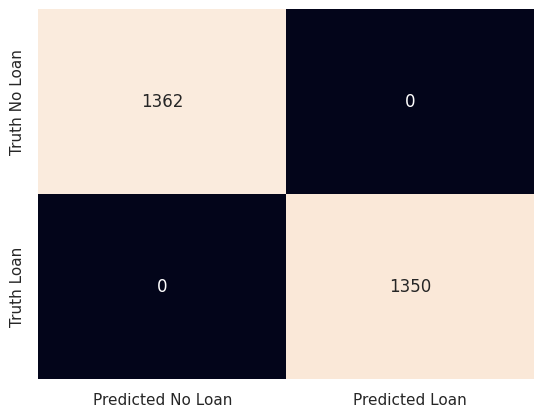

ROC AUC=1.000


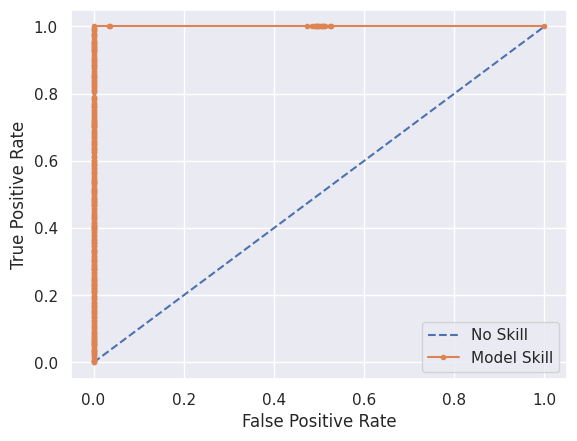

In [111]:
model = svm.SVC(gamma = 0.2, C=5, probability=True)
model.fit(X_train, y_train)
printModelMetrics(model, X_train, X_test, y_train, y_test)

# **Conclusion**

**Decision tree** and **Svm** is the best model with this problem!